## 加载模型
不要多次运行这个模块，每次运行会重新加载

In [11]:
import mxnet as mx
from mxnet import image,nd
import numpy as np
from utils.utils import show_det_result
from utils.coinscount_utils import SSD, predict
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
%matplotlib inline
from time import time

num_class = 2
data_shape = (3, 512, 512)
batch_size = 4
rgb_mean = np.array([123, 117, 104]).astype('float32')
std = np.array([58.395, 57.12, 57.375])

try:
    ctx = mx.gpu()
except Exception:
    ctx = mx.cpu()

def process_image(fname):
    with open(fname, 'rb') as f:
        im = image.imdecode(f.read())
    # resize to data_shape
    data = image.imresize(im, data_shape[1], data_shape[2])
    # minus rgb mean
    data = (data.astype('float32') - nd.array(rgb_mean)) / nd.array(std)
    # convert to batch x channel x height xwidth
    return data.transpose((2,0,1)).expand_dims(axis=0), im.astype('float32')



sizes_list = [[ 0.10416667 ,0.17361111], [0.18624024, 0.34354575], [.37,.619],
                      [.71,.79], [.88,.961]]
ratios_list = [[1, 2, .5]]*len(sizes_list)

# try catch避免net被多次创建，每次运行都会重新创建一个net对象，而且之前创建的不会被释放
# try catch to avoid creating net multi-times, we will got a new net object while every time create, 
# but the net we create before will never release(delete), it will cost too much (CPU/GPU)memory.
try:
    net
except BaseException:
    net = SSD(num_class, sizes_list, ratios_list, ctx=ctx, verbose=False, prefix="ssd_")
    net.load_params("models/sdl_coin_vgg11bn28_512x512_data_sizes.param", ctx=ctx)
    


precdict cost 0.008479 s.


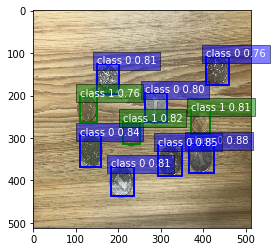

In [12]:
data, im = process_image("_image/21.jpg")
data = data.as_in_context(ctx)
tic = time()
out = predict(net, data)
print "precdict cost %f s." % (time()-tic)
show_det_result(im, out[0])

del data